# Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Set Project Paths

In [3]:
import os

# Path to the main folder in Google Drive
project_path = "/content/drive/MyDrive/Colab Notebooks/ds_Ashutosh_Choudhury"

# Subfolder paths
csv_path = os.path.join(project_path, "csv_files")
output_path = os.path.join(project_path, "outputs")

print(csv_path)               # See the exact path
print(os.listdir(csv_path))   # List everything in the folder

/content/drive/MyDrive/Colab Notebooks/ds_Ashutosh_Choudhury/csv_files
['historical_data.csv', 'fear_greed_index.csv', 'clean_merged_dataset.csv', 'clean_merged_dataset.gsheet']


# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Datasets

In [5]:
sentiment_df = pd.read_csv(os.path.join(csv_path, "fear_greed_index.csv"))
trader_df = pd.read_csv(os.path.join(csv_path, "historical_data.csv"))

# Initial Analysis

In [6]:
print("Sentiment Dataset Shape:", sentiment_df.shape)

Sentiment Dataset Shape: (2644, 4)


In [7]:
print("Trader Dataset Shape:", trader_df.shape)

Trader Dataset Shape: (211224, 16)


In [8]:
print("Sentiment Dataset Preview:\n")
display(sentiment_df.head())

Sentiment Dataset Preview:



,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [9]:
print("Trader Dataset Preview:\n")
display(trader_df.head())

Trader Dataset Preview:



,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [10]:
print("Sentiment Dataset Info:\n")
print(sentiment_df.info())

Sentiment Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None


In [11]:
print("Trader Dataset Info:\n")
print(trader_df.info())

Trader Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dty

In [12]:
# Missing values in Sentiment Database

print("Missing values in Sentiment Database:\n")
print(sentiment_df.isnull().sum())

Missing values in Sentiment Database:

timestamp         0
value             0
classification    0
date              0
dtype: int64


In [13]:
# Missing values in Trader Database

print("Missing values in Trader Database:\n")
print(trader_df.isnull().sum())

Missing values in Trader Database:

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


# Data Cleaning

*Sentiment Dataset Cleaning*

In [14]:
# Convert 'date' to datetime format
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], format = '%Y-%m-%d')

# Convert 'timestamp' to datetime format (from UNIX seconds)
sentiment_df['timestamp'] = pd.to_datetime(sentiment_df['timestamp'], unit = 's')

# Standardize classification text
sentiment_df['classification'] = sentiment_df['classification'].str.strip().str.title()

# Remove duplicates (if any)
sentiment_df.drop_duplicates(inplace=True)

# Reset index
sentiment_df.reset_index(drop=True, inplace=True)

print("Sentiment Dataset after cleaning:\n")
display(sentiment_df.head())

Sentiment Dataset after cleaning:



,timestamp,value,classification,date
0,2018-02-01 05:30:00,30,Fear,2018-02-01
1,2018-02-02 05:30:00,15,Extreme Fear,2018-02-02
2,2018-02-03 05:30:00,40,Fear,2018-02-03
3,2018-02-04 05:30:00,24,Extreme Fear,2018-02-04
4,2018-02-05 05:30:00,11,Extreme Fear,2018-02-05


*Trader Dataset Cleaning*

In [25]:
# Convert 'Timestamp IST' to datetime format
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format = '%d-%m-%Y %H:%M')

# Convert 'Timestamp' to datetime format (from UNIX seconds)
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'], unit = 'ms' )

# Standardize text fields
trader_df['Account'] = trader_df['Account'].astype(str)
trader_df['Coin'] = trader_df['Coin'].str.strip()
trader_df['Side'] = trader_df['Side'].str.strip().str.upper()
trader_df['Direction'] = trader_df['Direction'].str.strip().str.title()
trader_df['Trade ID'] = trader_df['Trade ID'].astype(str).str.replace('.0', '')

# Remove duplicates (if any)
trader_df.drop_duplicates(inplace=True)

# Reset index
trader_df.reset_index(drop=True, inplace=True)

print("Trader Dataset after cleaning:\n")
display(trader_df.head())

Trader Dataset after cleaning:



,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,895000000000000,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,443000000000000,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,660000000000000,2024-10-27 03:33:20,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1080000000000000,2024-10-27 03:33:20,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1050000000000000,2024-10-27 03:33:20,2024-10-27


# Merge Datasets

In [26]:
# Create date column from trader_df['Timestamp'] to match sentiment_df['date']
trader_df['date'] = trader_df['Timestamp'].dt.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

# Merge on 'date'
merged_df = pd.merge(trader_df, sentiment_df, on='date',how='left')

print("Merged Dataset:\n")
display(merged_df.head())

Merged Dataset:



,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,895000000000000,2024-10-27 03:33:20,2024-10-27,2024-10-27 05:30:00,74.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,443000000000000,2024-10-27 03:33:20,2024-10-27,2024-10-27 05:30:00,74.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,660000000000000,2024-10-27 03:33:20,2024-10-27,2024-10-27 05:30:00,74.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1080000000000000,2024-10-27 03:33:20,2024-10-27,2024-10-27 05:30:00,74.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1050000000000000,2024-10-27 03:33:20,2024-10-27,2024-10-27 05:30:00,74.0,Greed


*Merged Dataset Cleaning*

In [27]:
# Convert 'value' to numeric, keep original if coercion fails
merged_df['value'] = pd.to_numeric(merged_df['value'], errors='coerce')

# Fill NaN in 'value' ONLY if necessary, otherwise keep existing
merged_df['value'] = merged_df['value'].fillna(0)

# Fill missing 'classification' with 'Neutral' but only missing ones
merged_df['classification'] = merged_df['classification'].fillna('Neutral')

# Convert classification to categorical
merged_df['classification'] = merged_df['classification'].astype('category')

*Save the processed DataFrame to CSV*

In [28]:
out_path = os.path.join(csv_path, "clean_merged_dataset.csv")
merged_df.to_csv(out_path, index=False)
print("Saved:", out_path)

Saved: /content/drive/MyDrive/Colab Notebooks/ds_Ashutosh_Choudhury/csv_files/clean_merged_dataset.csv


# Exploratory Data Analysis (EDA)

- *Summary Statistics*

In [41]:
# Load cleaned csv
merged_df = pd.read_csv(os.path.join(csv_path, "clean_merged_dataset.csv"))

# Summary stats for trader behavior metrics available
print("Summary Statistics for Trader Behavior Metrics:\n")
display(merged_df[['Closed PnL', 'Size USD', 'Size Tokens']].describe())

# Sentiment class distribution
print("\nSentiment Classification Counts:\n")
print(merged_df['classification'].value_counts())

Summary Statistics for Trader Behavior Metrics:



,Closed PnL,Size USD,Size Tokens
count,211224.000000,2.112240e+05,2.112240e+05
mean,48.749001,5.639451e+03,4.623365e+03
std,919.164828,3.657514e+04,1.042729e+05
min,-117990.104100,0.000000e+00,8.740000e-07
25%,0.000000,1.937900e+02,2.940000e+00
50%,0.000000,5.970450e+02,3.200000e+01
75%,5.792797,2.058960e+03,1.879025e+02
max,135329.090100,3.921431e+06,1.582244e+07



Sentiment Classification Counts:

classification
Fear             133871
Greed             36289
Neutral           34102
Extreme Greed      6962
Name: count, dtype: int64


In [20]:
# 'value' column summary
print(merged_df['value'].describe())
print(merged_df['value'].unique())

count    211224.000000
mean         45.034172
std          21.289751
min           0.000000
25%          44.000000
50%          44.000000
75%          44.000000
max          84.000000
Name: value, dtype: float64
[74. 44.  0. 84. 50. 69. 59.]


- *Visualizations*

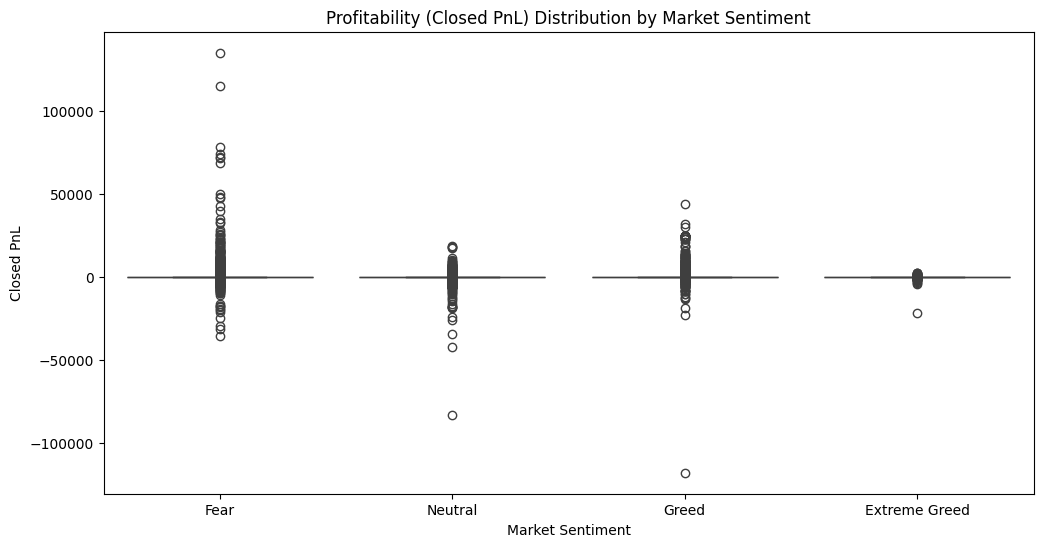

In [64]:
# Boxplot of Profitability (Closed PnL) by Sentiment Class

plt.figure(figsize=(12,6))
sns.boxplot(x='classification', y='Closed PnL', data=merged_df,
            order=['Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Profitability (Closed PnL) Distribution by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')

plt.savefig(os.path.join(output_path, 'boxplot_pnl_sentiment.png'), bbox_inches='tight')

plt.show()

*The profit results (Closed PnL) vary a lot in all sentiment types, with some traders making very big gains or losses. These extreme results happen more often when the market is in Fear or Greed, showing that traders tend to take bigger risks during these times.*

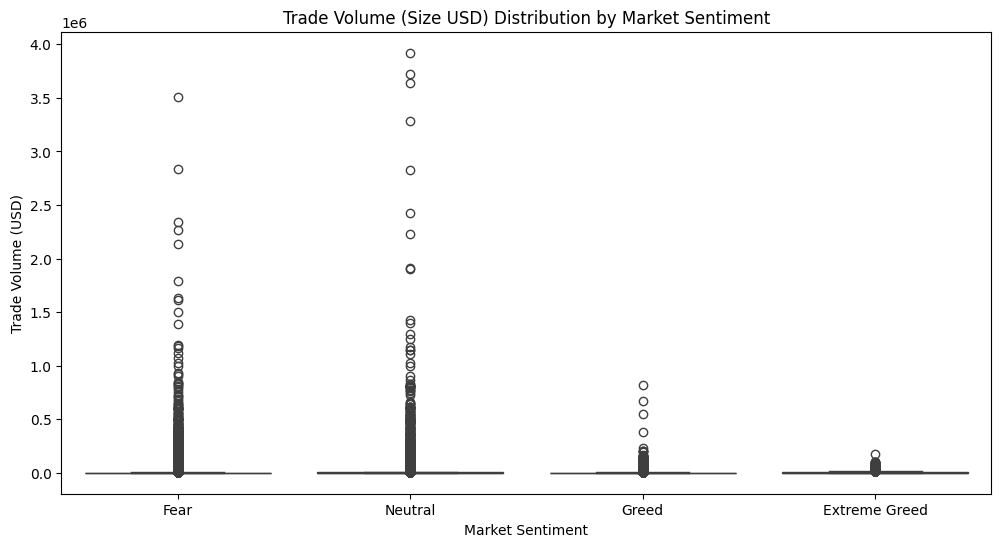

In [68]:
# Boxplot of Trade Volume (Size USD) by Sentiment Class

plt.figure(figsize=(12,6))
sns.boxplot(x='classification', y='Size USD', data=merged_df,
            order=['Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Trade Volume (Size USD) Distribution by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Trade Volume (USD)')

plt.savefig(os.path.join(output_path, 'boxplot_volume_sentiment.png'), bbox_inches='tight')

plt.show()

*Most trades happen at smaller volumes, but a few very large trades appear in all market conditions. The biggest trade volumes are seen during Neutral and Fear times, suggesting some traders make huge moves when the market isn’t overly emotional or when caution is high.*

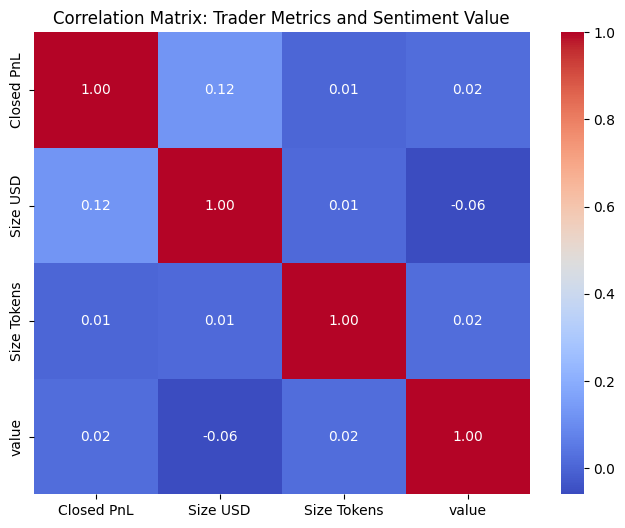

In [69]:
# Correlation Heatmap between Metrics

plt.figure(figsize=(8,6))
corr = merged_df[['Closed PnL', 'Size USD', 'Size Tokens', 'value']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Trader Metrics and Sentiment Value')

plt.savefig(os.path.join(output_path, 'correlation_heatmap.png'), bbox_inches='tight')

plt.show()

*There is no strong link between sentiment (value) and trading metrics like profit, trade size in USD, or tokens. The numbers are all close to zero, meaning sentiment alone doesn’t directly predict how much traders profit or how big their trades are.*

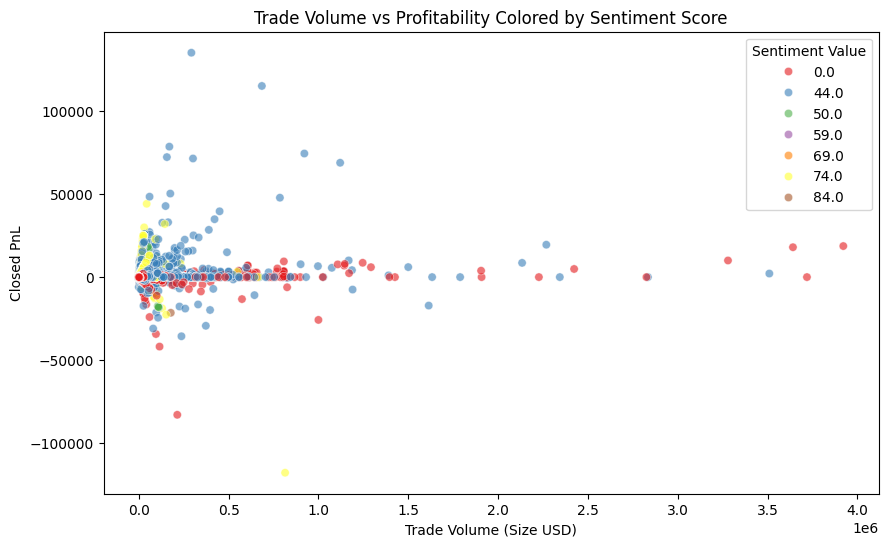

In [70]:
# Scatterplot of Trade Volume vs Profitability colored by Sentiment Score

plt.figure(figsize=(10,6))
sns.scatterplot(x='Size USD', y='Closed PnL', hue='value', palette='Set1', data=merged_df, alpha=0.6)
plt.title('Trade Volume vs Profitability Colored by Sentiment Score')
plt.xlabel('Trade Volume (Size USD)')
plt.ylabel('Closed PnL')
plt.legend(title='Sentiment Value')

plt.savefig(os.path.join(output_path, 'scatter_volume_pnl_sentiment.png'), bbox_inches='tight')

plt.show()

*Most trades, no matter the market mood, have small profits or losses. Big profits or losses are rare and spread across all sentiment levels. This means higher trade volume doesn’t always mean bigger profits, and sentiment score alone doesn’t clearly predict outcomes.*

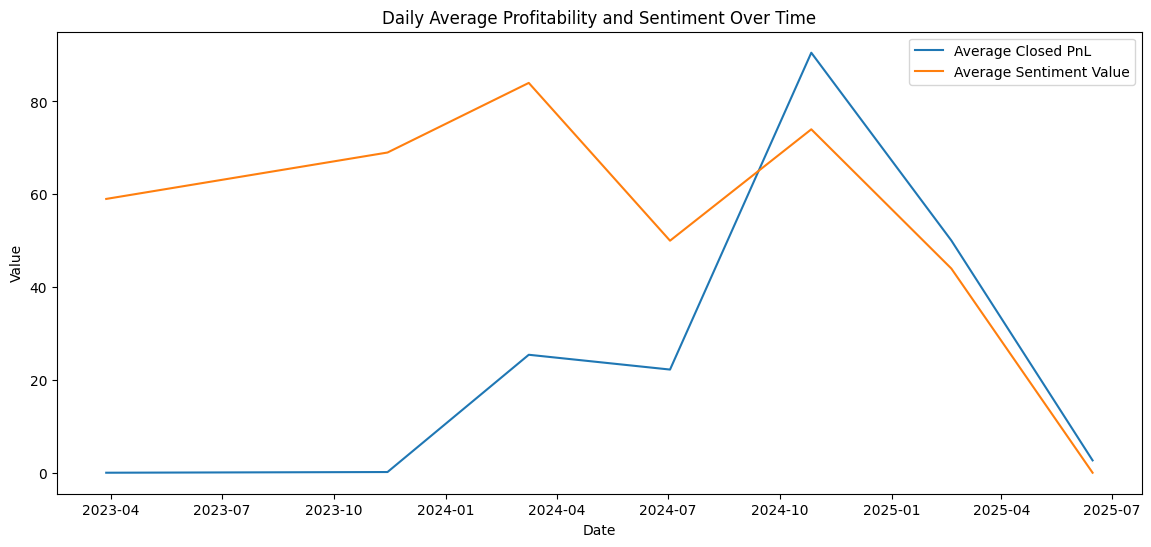

In [71]:
# Line plot of Daily Average Profitability and Sentiment Value over time

merged_df['date'] = pd.to_datetime(merged_df['date'])

daily_stats = merged_df.groupby('date').agg({
    'Closed PnL': 'mean',
    'value': 'mean'
}).reset_index()

plt.figure(figsize=(14,6))
plt.plot(daily_stats['date'], daily_stats['Closed PnL'], label='Average Closed PnL')
plt.plot(daily_stats['date'], daily_stats['value'], label='Average Sentiment Value')
plt.legend()
plt.title('Daily Average Profitability and Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

plt.savefig(os.path.join(output_path, 'line_avg_pnl_sentiment.png'), bbox_inches='tight')

plt.show()

*Over time, the market’s mood (sentiment) and average trader profits move in similar patterns. When sentiment improves, profits often rise, and when sentiment drops, profits tend to fall. This suggests trader performance is somewhat linked to overall market mood.*